In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd

# Load your CSV
df = pd.read_csv("remote_jobs_clean.csv")
df.head()


,title,company,location,Salary in $,Posted_date,expected_salary,min_salary,max_salary
0,Software Engineer,Upvest,Probably worldwide,70000-120000,2025-04-24,95000.0,70000,120000
1,Senior Software Engineer KSPM,Cast AI,Probably worldwide,70000-120000,2025-04-24,95000.0,70000,120000
2,Software Engineer III,Jack Henry,Probably worldwide,55000-100000,2025-04-24,77500.0,55000,100000
3,Back End Developer Winna.com,Winna,Worldwide,40000-80000,2025-04-17,60000.0,40000,80000
4,Software Engineer Infrastructure,Gauntlet,Worldwide,60000-80000,2025-04-24,70000.0,60000,80000


### Jobs posted per location

In [20]:
df['location'].value_counts().head(10)

location
Probably worldwide      60
Worldwide               50
United States           50
Madrid HQ, ES           10
Toronto                 10
Contractor              10
Remote/Teleworker US    10
Name: count, dtype: int64

## How many job are there for each job title

In [63]:
df['title'].value_counts().head(20)

title
Software Engineer                               20
Senior React Full stack Developer               10
Staff Software Engineer Metrics US              10
Full Stack Engineer                             10
Solidity Engineer Smart Contracts Engineer      10
Staff Backend Engineer                          10
Principal Software Engineer                     10
DevOps Engineer                                 10
Technical Product Manager Developer Platform    10
Senior Fullstack Engineer                       10
Senior Software Engineer KSPM                   10
Software Engineer Microservices                 10
HQ Senior Frontend Engineer                     10
Software Engineer III Frontend                  10
Software Engineer Data                          10
Software Engineer Infrastructure                10
Back End Developer Winna.com                    10
Software Engineer III                           10
Kubernetes Engineer                             10
Name: count, dtype: int64

## companies are offering the highest maximum salary

In [76]:
df[['company', 'max_salary']].sort_values(by='max_salary', ascending=False)


,company,max_salary
70,Lemon.io,230000
10,Lemon.io,230000
50,Lemon.io,230000
110,Lemon.io,230000
30,Lemon.io,230000
...,...,...
98,Weights & Biases,80000
39,"00100 LEIDOS, INC.",80000
164,Gauntlet,80000
19,"00100 LEIDOS, INC.",80000


## How many jobs were posted on each date

In [79]:
df['Posted_date'].value_counts().sort_index()


Posted_date
2025-04-09    10
2025-04-15    20
2025-04-17    10
2025-04-18    20
2025-04-19    10
2025-04-20    10
2025-04-21    10
2025-04-22    10
2025-04-23    20
2025-04-24    80
Name: count, dtype: int64

## companies consistently paying above the average expected salary 

In [84]:
average_expected = df['expected_salary'].mean()
df['above_average_expected'] = df['expected_salary'] > average_expected
above_avg_by_company = df.groupby('company')['above_average_expected'].mean().sort_values(ascending=False)
above_avg_by_company


company
Serotonin             1.0
Upvest                1.0
Job&Talent            1.0
Lemon.io              1.0
Stealth               1.0
Cast AI               1.0
Shippo                1.0
Gauntlet              0.5
00100 LEIDOS, INC.    0.0
Weights & Biases      0.0
TrueML                0.0
ScaleTech             0.0
Sei Labs              0.0
MoonPay               0.0
Kong                  0.0
Jack Henry            0.0
Dapper Labs           0.0
Winna                 0.0
Name: above_average_expected, dtype: float64

## job titles offer salaries above the 75th percentile of all max salaries

In [87]:
threshold = df['max_salary'].quantile(0.75)
high_salary_jobs = df[df['max_salary'] > threshold]
high_salary_jobs[['title', 'company', 'max_salary']]


,title,company,max_salary
10,Senior React Full stack Developer,Lemon.io,230000
17,Full Stack Engineer,Stealth,180000
30,Senior React Full stack Developer,Lemon.io,230000
37,Full Stack Engineer,Stealth,180000
50,Senior React Full stack Developer,Lemon.io,230000
57,Full Stack Engineer,Stealth,180000
70,Senior React Full stack Developer,Lemon.io,230000
77,Full Stack Engineer,Stealth,180000
90,Senior React Full stack Developer,Lemon.io,230000
97,Full Stack Engineer,Stealth,180000


## Salary ranges

In [22]:
print("Expected Salary Summary:")
print(df['expected_salary'].describe())

print("\nMinimum Salary Summary:")
print(df['min_salary'].describe())

print("\nMaximum Salary Summary:")
print(df['max_salary'].describe())

high_paying_jobs = df[df['max_salary'] > 100000]
print("Jobs with max salary over $100k:\n")
print(high_paying_jobs[['title', 'company', 'location', 'max_salary']])


Expected Salary Summary:
count       200.000000
mean      87125.000000
std       19021.196191
min       60000.000000
25%       74750.000000
50%       81500.000000
75%       95000.000000
max      145000.000000
Name: expected_salary, dtype: float64

Minimum Salary Summary:
count      200.000000
mean     63450.000000
std       7664.281182
min      40000.000000
25%      60000.000000
50%      64000.000000
75%      70000.000000
max      75000.000000
Name: min_salary, dtype: float64

Maximum Salary Summary:
count       200.000000
mean     110800.000000
std       36191.284106
min       80000.000000
25%       85000.000000
50%      100000.000000
75%      120000.000000
max      230000.000000
Name: max_salary, dtype: float64
Jobs with max salary over $100k:

                                 title     company            location  \
0                    Software Engineer      Upvest  Probably worldwide   
1        Senior Software Engineer KSPM     Cast AI  Probably worldwide   
5               Softw

## Keyword trends in job titles

In [24]:
from collections import Counter
import re

all_titles = " ".join(df['title'].dropna())
words = re.findall(r'\w+', all_titles.lower())
common_keywords = Counter(words).most_common(20)
common_keywords

[('engineer', 180),
 ('software', 100),
 ('senior', 40),
 ('developer', 30),
 ('iii', 20),
 ('frontend', 20),
 ('full', 20),
 ('stack', 20),
 ('staff', 20),
 ('kspm', 10),
 ('back', 10),
 ('end', 10),
 ('winna', 10),
 ('com', 10),
 ('infrastructure', 10),
 ('data', 10),
 ('hq', 10),
 ('microservices', 10),
 ('fullstack', 10),
 ('react', 10)]

## Bar chart: Top job locations

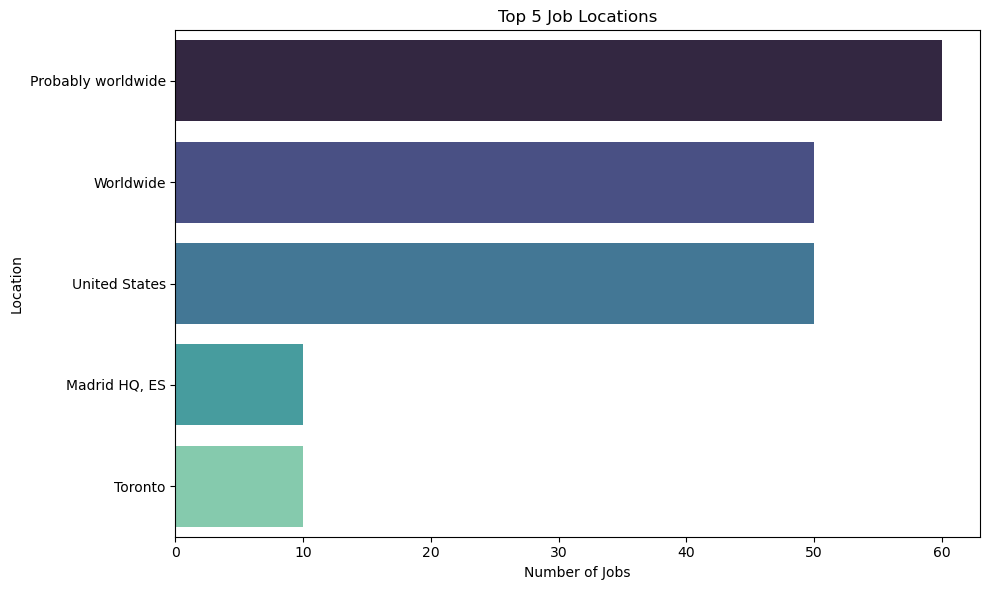

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top_locations = df['location'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='mako')
plt.title("Top 5 Job Locations")
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

## Bar plot to compare the minimum and maximum salaries for each job title

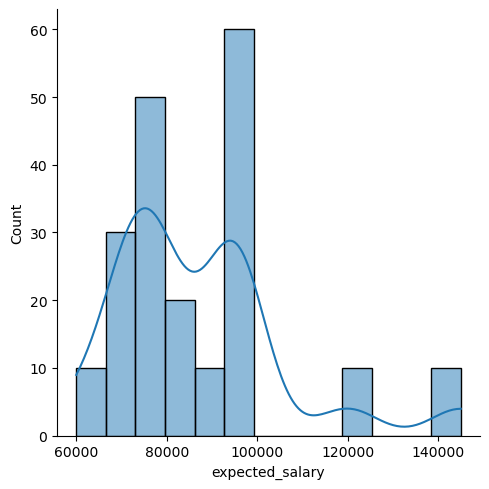

In [53]:
sns.displot(df['expected_salary'],kde=True)

## Word cloud: Common keywords in job titles

In [28]:
!pip install wordcloud

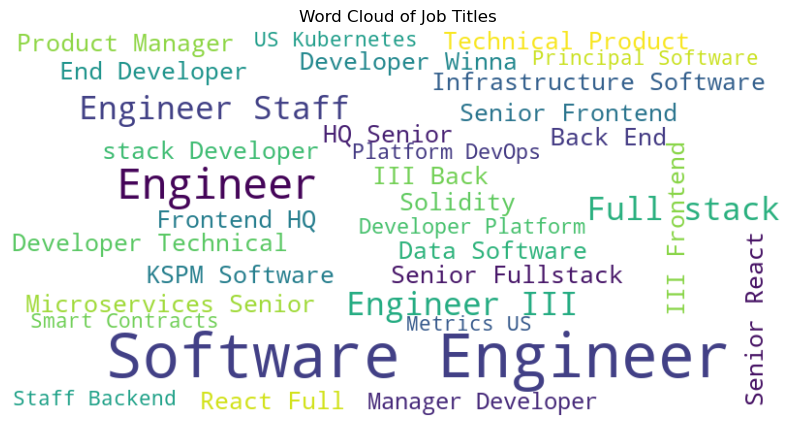

In [29]:
from wordcloud import WordCloud

all_titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Job Titles")
plt.show()

## Box plot: Salary range (if available)

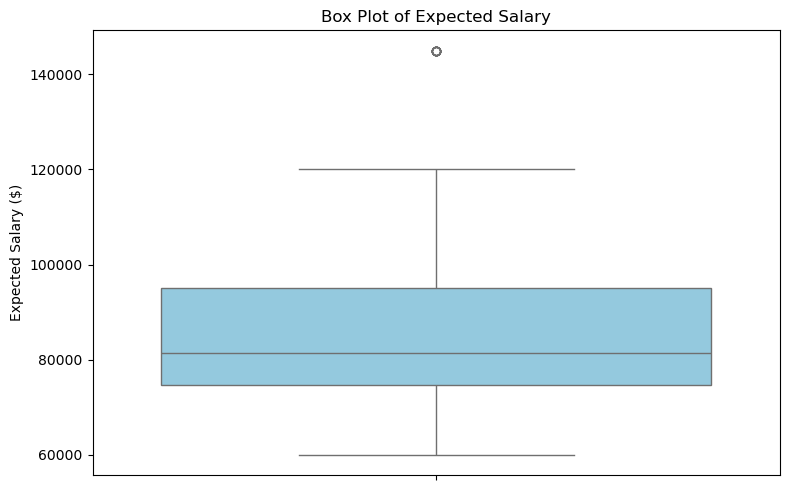

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='expected_salary', color='skyblue')
plt.title("Box Plot of Expected Salary")
plt.ylabel("Expected Salary ($)")
plt.tight_layout()
plt.show()

## Trend chart: Jobs posted over days/weeks

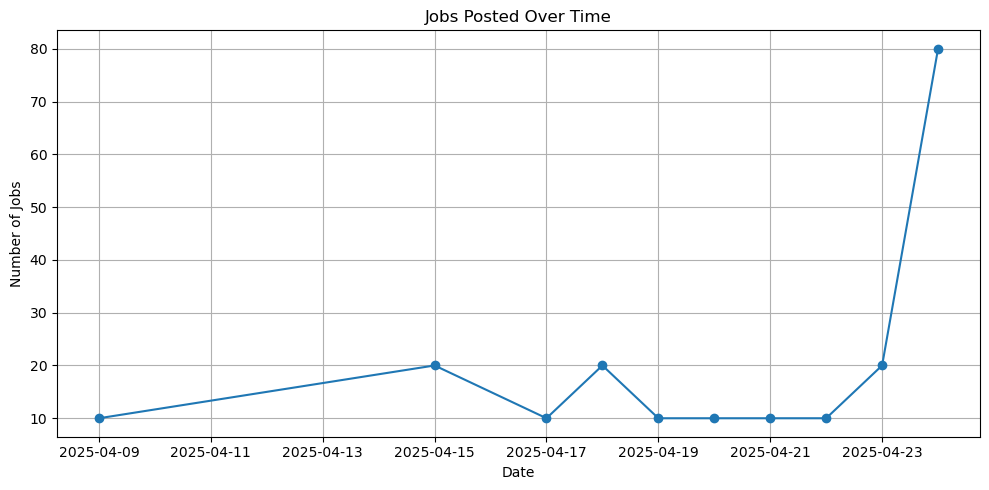

In [33]:
df['Posted_date'] = pd.to_datetime(df['Posted_date'], errors='coerce')
job_trend = df.groupby(df['Posted_date'].dt.date).size()

plt.figure(figsize=(10, 5))
job_trend.plot(kind='line', marker='o')
plt.title("Jobs Posted Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

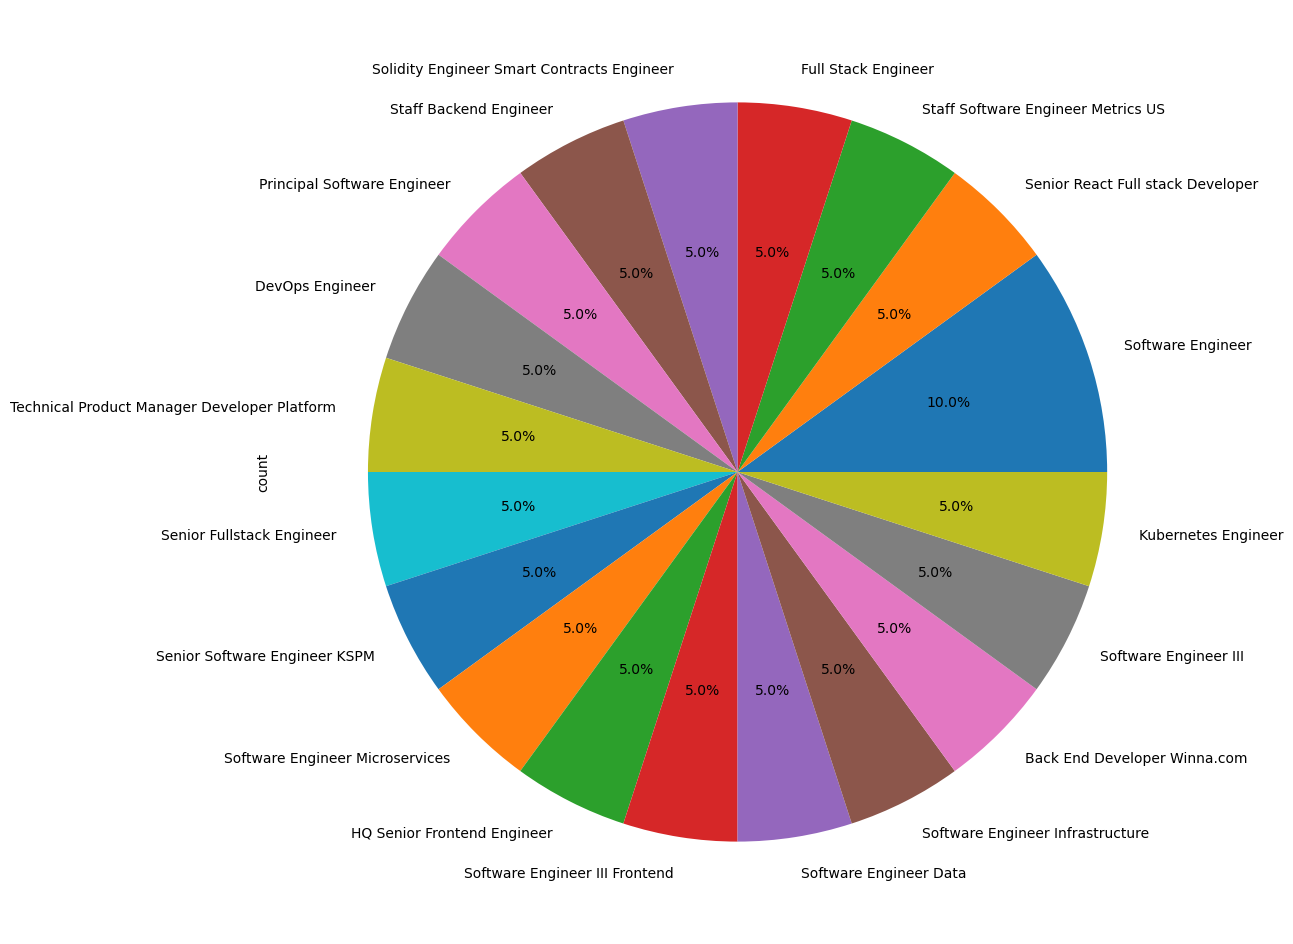

In [61]:
df['title'].value_counts().head(20).plot.pie(y=df['title'],figsize=(12,12),autopct='%1.1f%%')

In [65]:
l=df['title'].value_counts().head(20)

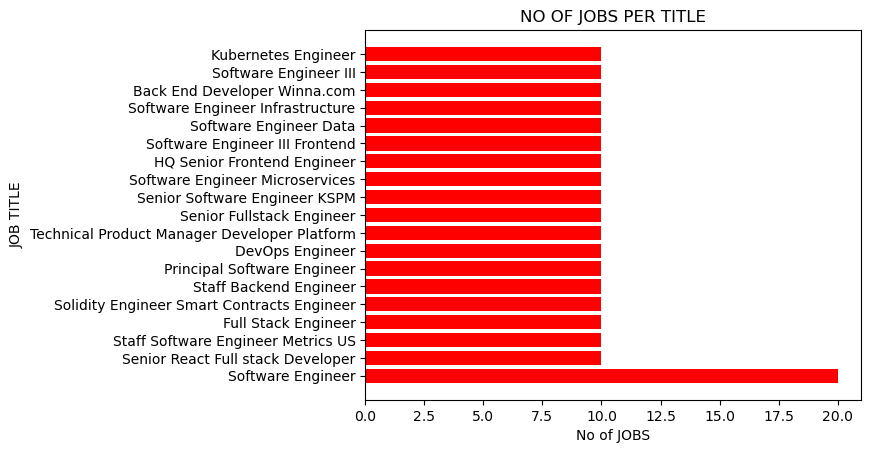

In [67]:
plt.barh(l.index,l,color='r')
plt.title("NO OF JOBS PER TITLE")

plt.xlabel("No of JOBS")
plt.ylabel('JOB TITLE')

plt.show()

## distribution of minimum, maximum salary

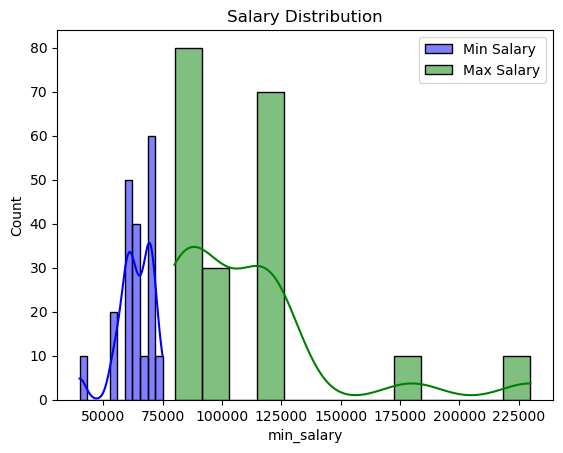

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['min_salary'], color='blue', kde=True, label='Min Salary')
sns.histplot(df['max_salary'], color='green', kde=True, label='Max Salary')

plt.legend()
plt.title("Salary Distribution")
plt.show()


## (Box Plot) salary ranges (min-max) vary across different job titles 

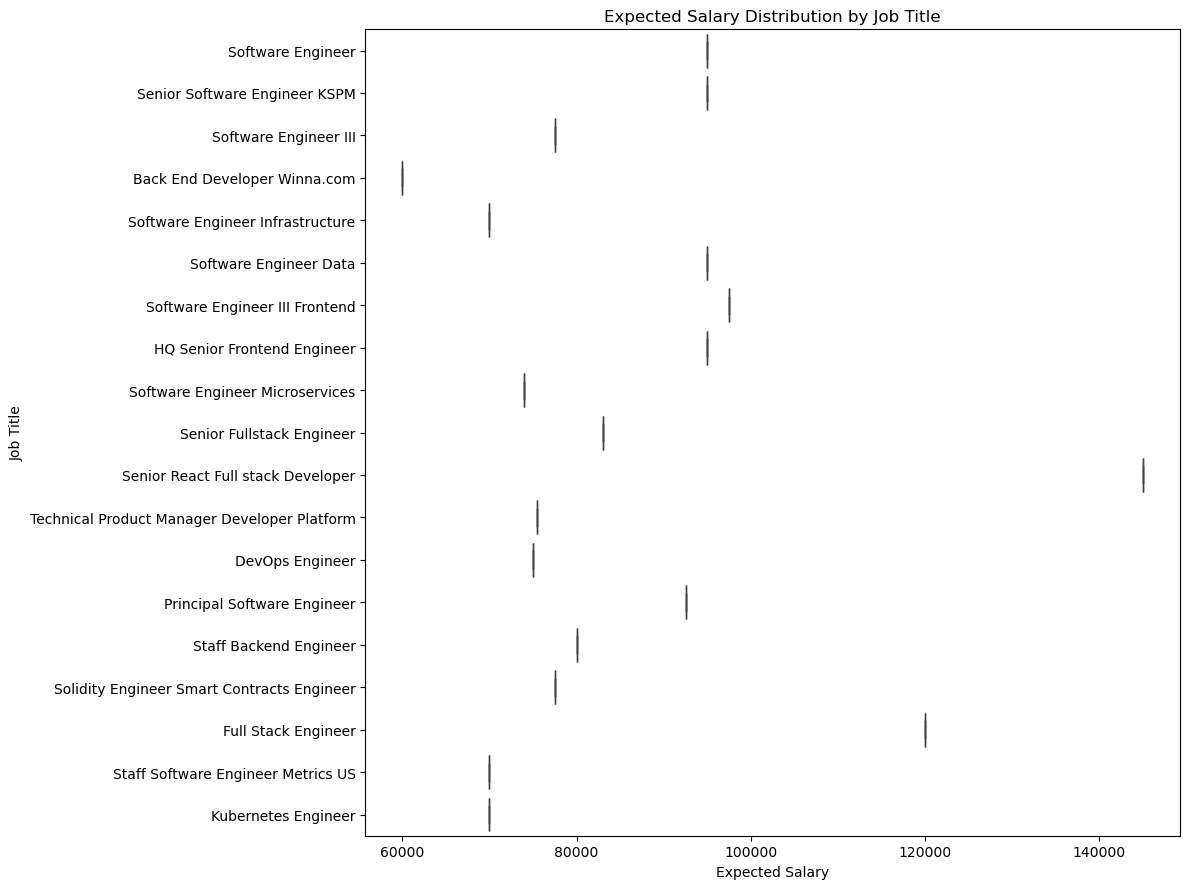

In [96]:


plt.figure(figsize=(12, 9))
sns.boxplot(data=df, x='expected_salary', y='title', orient='h')
plt.title("Expected Salary Distribution by Job Title")
plt.xlabel("Expected Salary")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


## (Bar Chart) expected average salary according to loacation  

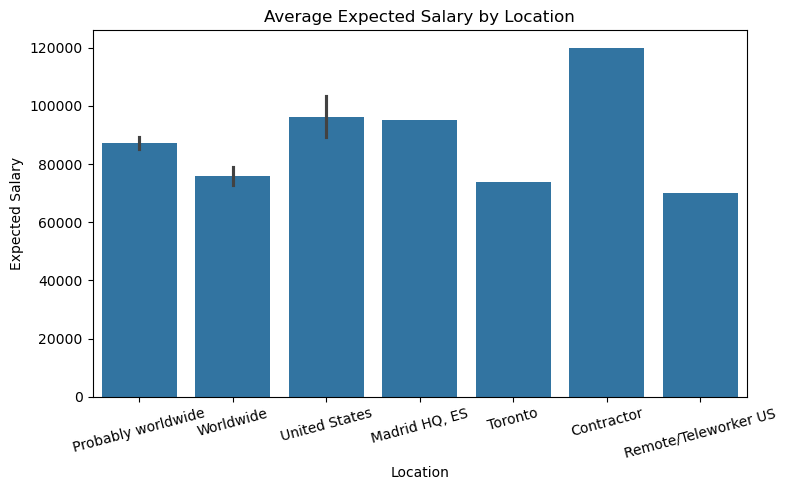

In [101]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='location', y='expected_salary')
plt.title("Average Expected Salary by Location")
plt.ylabel("Expected Salary")
plt.xlabel("Location")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
